# Company Problem

In this notebook, our goal is to familiarize you with Logica while also enabling you to contrast Logica with SQL.

### Package Import

You can disregard the message when executing the cell below

In [2]:
from logica import colab_logica
import pandas as pd
import sqlite3

In [3]:
%load_ext sql

### Database Creation

Logica is typically run on a database. Since we only possess CSV files, we need first create a database.

In [4]:
Dep=pd.read_csv("datasets/Department.csv")
Dpd=pd.read_csv("datasets/Dependent.csv")
Dep_loc=pd.read_csv("datasets/Dept_Location.csv")
Emp=pd.read_csv("datasets/Employee.csv")
Proj=pd.read_csv("datasets/Project.csv")
Works_On=pd.read_csv("datasets/Works_On.csv")

In [5]:
conn = sqlite3.connect('my_database.db')

Dep.to_sql('Department', conn, if_exists='replace', index=False)
Dpd.to_sql('Dependent', conn, if_exists='replace', index=False)
Dep_loc.to_sql('Dept_Location', conn, if_exists='replace', index=False)
Emp.to_sql('Employee', conn, if_exists='replace', index=False)
Proj.to_sql('Project', conn, if_exists='replace', index=False)
Works_On.to_sql('Works_On', conn, if_exists='replace', index=False)

conn.close()

### Queries

We've provided a range of queries, in SQL and Logica formats, sourced from the textbook "FUNDAMENTALS OF Database Systems". Consider these as your starting point. Enjoy!

#### Query 0: Retrieve the birth date and address of the employee(s) whose name is 'John B. Smith'.

$\mathrm{\sigma_{Fname='John' \land Minit='B' \land Lname='Smith'}(EMPLOYEE)}$

In [6]:
%%sql sqlite:///my_database.db
SELECT Bdate, Address
FROM EMPLOYEE
WHERE Fname='John' AND Minit='B' AND Lname='Smith'

Done.


Bdate,Address
1965-01-09,"731 Fondren,Houston,TX"


Query is stored at Q0_Result_sql variable.


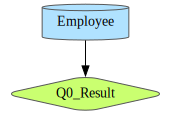

Running predicate: Q0_Result (1 ms)
The following table is stored at Q0_Result variable.


,Bdate,Address
0,1965-01-09,"731 Fondren,Houston,TX"


In [7]:
%%logica Q0_Result
@Engine("sqlite");
@AttachDatabase("mydata", "my_database.db");

Q0_Result(Bdate:x, Address:y) :- 
    Employee(Bdate:x, Address:y, Fname:"John", Minit:"B", Lname:"Smith");

#### Query 1: Retrieve the name and address of all employees who work for the 'Research' department. 

$\mathrm{\Pi_{Fname, Lname, Address}(\sigma_{Dname='Research'}(DEPARTMENT\bowtie_{Dnumber=Dno}(EMPLOYEE))}$

In [8]:
%%sql sqlite:///my_database.db
SELECT Fname,Lname,Address
FROM EMPLOYEE,DEPARTMENT
WHERE Dname='Research' AND Dnumber=Dno;

Done.


Fname,Lname,Address
Franklin,Wong,"638 Voss,Houston,TX"
John,Smith,"731 Fondren,Houston,TX"
Joyce,English,"5631 Rice,Houston,TX"
Ramesh,Narayan,"975 Fire Oak,Humble,TX"


Query is stored at Q1_Result_sql variable.


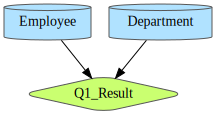

Running predicate: Q1_Result (1 ms)
The following table is stored at Q1_Result variable.


,Fname,Lname,address
0,Franklin,Wong,"638 Voss,Houston,TX"
1,John,Smith,"731 Fondren,Houston,TX"
2,Joyce,English,"5631 Rice,Houston,TX"
3,Ramesh,Narayan,"975 Fire Oak,Humble,TX"


In [9]:
%%logica Q1_Result
@Engine("sqlite");
@AttachDatabase("mydata", "my_database.db");


Q1_Result(Fname:fn, Lname:ln, address:add):- 
    Employee(Fname:fn, Lname:ln, Address:add, Dno:x), 
    Department(Dname:"Research", Dnumber:y),
    x=y;

#### Query 2: For every project located in 'Stafford', list the project number, the controlling department number, and the department manager's last name, address, and birth date. 

$\mathrm{\Pi_{Pnumber,Dnum,Lname,Address,Bdate}(((\sigma_{Plocation='Stafford'}(PROJECT))
\bowtie_{Dnum=Dnumber}(DEPARTMENT))\bowtie_{Mgr\_ssn=Ssn}(EMPLOYEE))}$

In [10]:
%%sql sqlite:///my_database.db
Select Pnumber,Dnum,Lname,Address,Bdate
From Project,Department,Employee
Where Dnum=Dnumber And Mgr_ssn=Ssn And Plocation='Stafford'

Done.


Pnumber,Dnum,Lname,Address,Bdate
10,4,Wallace,"291 Berry,Bellaire,TX",1941-06-20
30,4,Wallace,"291 Berry,Bellaire,TX",1941-06-20


Query is stored at Q2_Result_sql variable.


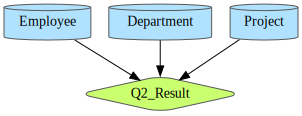

Running predicate: Q2_Result (1 ms)
The following table is stored at Q2_Result variable.


,Pnumber,Dnum,Lname,Address,Bdate
0,10,4,Wallace,"291 Berry,Bellaire,TX",1941-06-20
1,30,4,Wallace,"291 Berry,Bellaire,TX",1941-06-20


In [11]:
%%logica Q2_Result
@Engine("sqlite");
@AttachDatabase("mydata", "my_database.db");


Q2_Result(Pnumber:pn, Dnum:x, Lname:ln, Address:add, Bdate:bd):-
    Project(Pnumber:pn, Dnum:x, Plocation: "Stafford"), 
    Department(Dnumber:y, Mgr_ssn:ssn_1),
    Employee(Lname:ln, Address:add, Ssn:ssn_2, Bdate:bd),
    x=y, ssn_1=ssn_2;

#### Query 3: Who is the boss? The manager of the department that an employee works for!

$\mathrm{\Pi_{SSN, Lname, Address}(EMPLOYEE\bowtie_{Super\_Ssn=Ssn}(EMPLOYEE))}$

In [12]:
%%sql sqlite:///my_database.db

SELECT E.SSN as 'Employee', 
       M.SSN as 'Boss'
FROM   Employee E, 
       Employee M
WHERE E.Super_SSN = M.SSN
ORDER BY M.SSN;

Done.


Employee,Boss
123456789,333445555
666884444,333445555
453453453,333445555
333445555,888665555
987654321,888665555
999887777,987654321
987987987,987654321


Query is stored at Q3_Result_sql variable.


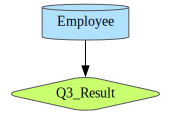

Running predicate: Q3_Result (1 ms)
The following table is stored at Q3_Result variable.


,Employee,Boss
0,333445555,333445555.0
1,888665555,888665555.0
2,987654321,987654321.0
3,888665555,888665555.0
4,333445555,333445555.0
5,333445555,333445555.0
6,987654321,987654321.0


In [13]:
%%logica Q3_Result
@Engine("sqlite");
@AttachDatabase("mydata", "my_database.db");

Q3_Result(Employee:y,Boss:x):- 
    Employee(Super_ssn:x),Employee(Ssn:y), x=y;

#### Query 4: Make a list of all project numbers for projects that involve an employee whose last name is ‘Smith’, either as a worker or as a manager of the department that controls the project.

$\mathrm{SMITHS(Essn) \leftarrow \pi_{Ssn}(\sigma_{Lname='Smith'}(EMPLOYEE))}$

$\mathrm{SMITH\_WORKER\_PROJS \leftarrow \pi_{Pno}(WORKS\_ON) \ast SMITHS}$

$\mathrm{MGRS \leftarrow \pi_{Lname,Dnumber}(EMPLOYEE \bowtie_{Ssn=Mgr\_ssn}DEPARTMENT)}$

$\mathrm{SMITH\_MANAGED\_DEPTS(Dnum) \leftarrow \pi_{Dnumber}(\sigma_{Lname='Smith'}(MGRS))}$

$\mathrm{SMITH\_MANAGED\_PROJS(Pno) \leftarrow \pi_{Pnumber}(SMITH\_MANAGED\_DEPTS * PROJECT)}$

$\mathrm{RESULT \leftarrow (SMITH\_WORKER\_PROJS \cup SMITH\_MANAGED\_PROJS)}$

In [14]:
%%sql sqlite:///my_database.db

SELECT DISTINCT P.Pnumber
FROM Project AS P
JOIN Department AS D ON P.Dnum = D.Dnumber
JOIN Employee AS E ON D.Mgr_ssn = E.ssn
WHERE E.Lname = 'Smith'

UNION

SELECT DISTINCT P.Pnumber
FROM Project AS P
JOIN Works_on AS W ON P.Pnumber = W.Pno
JOIN Employee AS E ON W.Essn = E.Ssn
WHERE E.Lname = 'Smith'

Done.


Pnumber
1
2


Query is stored at Q4_Result_sql variable.


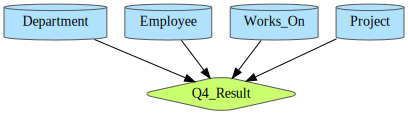

Running predicate: Q4_Result (1 ms)
The following table is stored at Q4_Result variable.


,Pnumber
0,1.0
1,2.0


In [15]:
%%logica Q4_Result
@Engine("sqlite");
@AttachDatabase("mydata", "my_database.db");

Q4_Result(Pnumber:pno):-
    Works_On(Essn:x, Pno:pno),
    Employee(Lname:"Smith",Ssn:y),
    x=y;
    
Q4_Result(Pnumber:pno):-
    Project(Pnumber:pno, Dnum:x),
    Department(Dnumber:y,Mgr_ssn:ssn_1),
    Employee(Ssn:ssn_2, Lname:"Smith"),
    x=y,
    ssn_1=ssn_2;

#### Query 5: For each employee, retrieve the employee’s first and last name and the first and last name of his or her immediate supervisor.

$\mathrm{\Pi_{E\_fname, E\_lname, S\_fname, S\_lname}(EMPLOYEE\bowtie_{Super\_Ssn=Ssn}(EMPLOYEE))}$

In [16]:
%%sql sqlite:///my_database.db

SELECT E.Fname as E_fname, E.Lname as E_lname, S.Fname as S_fname, S.Lname as S_lname
FROM EMPLOYEE AS E, EMPLOYEE AS S
WHERE E.Super_ssn = S.Ssn;

Done.


E_fname,E_lname,S_fname,S_lname
John,Smith,Franklin,Wong
Franklin,Wong,James,Borg
Alicia,Zelaya,Jennifer,Wallace
Jennifer,Wallace,James,Borg
Ramesh,Narayan,Franklin,Wong
Joyce,English,Franklin,Wong
Ahmad,Jabbar,Jennifer,Wallace


Query is stored at Q5_Result_sql variable.


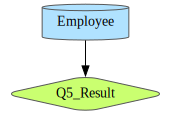

Running predicate: Q5_Result (1 ms)
The following table is stored at Q5_Result variable.


,E_fname,E_lname,S_fname,S_lname
0,John,Smith,Franklin,Wong
1,Franklin,Wong,James,Borg
2,Alicia,Zelaya,Jennifer,Wallace
3,Jennifer,Wallace,James,Borg
4,Ramesh,Narayan,Franklin,Wong
5,Joyce,English,Franklin,Wong
6,Ahmad,Jabbar,Jennifer,Wallace


In [17]:
%%logica Q5_Result

@Engine("sqlite");
@AttachDatabase("mydata", "my_database.db");

Q5_Result(E_fname:fn_x, E_lname:ln_x, S_fname:fn_y,S_lname:ln_y):- 
    Employee(Fname:fn_x, Lname:ln_x,Super_ssn:x),
    Employee(Fname:fn_y, Lname:ln_y,Ssn:y), 
    x=y;

#### Query 6: Select all combinations of EMPLOYEE Ssn and DEPARTMENT Dname (Q10) in the database

$\mathrm{\sigma_{Ssn, Dname}EMPLOYEE \times DEPARTMENT}$

In [18]:
%%sql sqlite:///my_database.db
    
SELECT Ssn, Dname
FROM EMPLOYEE, DEPARTMENT

Done.


Ssn,Dname
123456789,Research
123456789,Administration
123456789,Headquarters
333445555,Research
333445555,Administration
333445555,Headquarters
999887777,Research
999887777,Administration
999887777,Headquarters
987654321,Research


Query is stored at Q6_Result_sql variable.


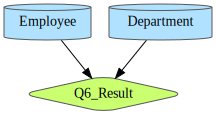

Running predicate: Q6_Result (1 ms)
The following table is stored at Q6_Result variable.


,Ssn,Dname
0,123456789,Research
1,123456789,Administration
2,123456789,Headquarters
3,333445555,Research
4,333445555,Administration
5,333445555,Headquarters
6,999887777,Research
7,999887777,Administration
8,999887777,Headquarters
9,987654321,Research


In [19]:
%%logica Q6_Result
@Engine("sqlite");
@AttachDatabase("mydata", "my_database.db");

Q6_Result(Ssn:x, Dname:y):-
    Employee(Ssn:x), Department(Dname:y);

#### Query 7: Show the resulting salaries if every employee working on the ‘ProductX’ project is given a 10% raise

$\mathrm{EMP\_PROJX \leftarrow \sigma_{Pname='ProjectX'}(WORKS\_ON \bowtie_{Pno=Pnumber} PROJECT)}$

$\mathrm{RESULT(Fname, Lname, Increased\_sal) \leftarrow \pi_{Fname, Lname, 1.1*Salary}(EMPLOYEE \bowtie_{Ssn=Essn} EMP\_PROJX)}$

In [20]:
%%sql sqlite:///my_database.db
    
SELECT E.Fname, E.Lname, 1.1 * E.Salary AS Increased_sal
FROM EMPLOYEE AS E, WORKS_ON AS W, PROJECT AS P
WHERE E.Ssn = W.Essn AND W.Pno = P.Pnumber AND
P.Pname = 'ProductX';

Done.


Fname,Lname,Increased_sal
John,Smith,33000.0
Joyce,English,27500.000000000004


Query is stored at Q7_Result_sql variable.


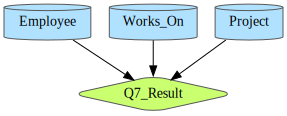

Running predicate: Q7_Result (1 ms)
The following table is stored at Q7_Result variable.


,Fname,Lname,Increased_Sal
0,John,Smith,33000.0
1,Joyce,English,27500.0


In [21]:
%%logica Q7_Result
@Engine("sqlite");
@AttachDatabase("mydata", "my_database.db");

Q7_Result(Fname:fn, Lname:ln, Increased_Sal:sl*1.1):-
    Employee(Fname:fn, Lname:ln,SSn:ssn1, Salary:sl),
    Works_On(Essn:ssn2, Pno:x), 
    Project(Pname:"ProductX",Pnumber:y),
    ssn1=ssn2, x=y;

## Logica Exercises

#### Exercise: Week 9/Q4: Retrieve the name and address of all employees who work for the 'Administration' department. 

In [22]:
%%logica Q4
@Engine("sqlite");
@AttachDatabase("mydata", "my_database.db");

# Insert your logica query here
Q4(Fname:fn, Lname:ln, Address:ad):-

Encountered error when compiling Q8_Result.


Compiling:
        ¯\_(ツ)_/¯

[ Error ] No rules are defining Q8_Result, but compilation was requested.


#### Exercise: Week 9/Q6: Retrieve the name of each employee who has a dependent with the same sex as the employee.

In [23]:
%%logica Q9_Result
@Engine("sqlite");
@AttachDatabase("mydata", "my_database.db");

# Insert your logica query here
Q6(Fname:fn, Lname:ln, Dependent_name:dn):-

Encountered error when compiling Q9_Result.


Compiling:
        ¯\_(ツ)_/¯

[ Error ] No rules are defining Q9_Result, but compilation was requested.
